In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append("..")
from src.config import *

# Globals
RANDOM_STATE = 1

In [2]:
df_path = os.path.join(CONFIG["paths"]["datasets"], "train_10000_gemaps_ids.feather")
df = pd.read_feather(df_path)
df = df.set_index("dataset_id")
df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,...,id_70,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79
dataset_id,,,,,,,,,,,,,,,,,,,,,
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,33.945885,0.199680,28.514013,...,0.335059,0.789295,-0.108900,-0.620182,-0.084505,0.301494,1.104382,-0.394134,-0.479879,-0.538723
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,35.520039,0.186342,30.745964,...,0.125543,0.401296,-0.350142,-1.209929,0.511581,0.289962,0.769065,-0.184049,-0.432616,-0.281912
id00012__raOc3-IRsw_00112,id00012,n000012,m,train,_raOc3-IRsw,00112,1,37.510632,0.200410,30.035391,...,0.220170,0.297167,-0.444118,-0.704579,0.436096,0.349816,0.794942,-0.259238,-0.737127,-0.664549
id00012__raOc3-IRsw_00111,id00012,n000012,m,train,_raOc3-IRsw,00111,1,37.014935,0.244918,28.439920,...,0.219820,0.443320,-0.081468,-1.005331,0.272788,-0.023903,0.831165,-0.559893,-0.450340,-0.833439
id00012__raOc3-IRsw_00113,id00012,n000012,m,train,_raOc3-IRsw,00113,1,37.225666,0.215866,30.978403,...,0.110089,0.352385,-0.261673,-0.616003,-0.023035,0.317792,0.762406,-0.024848,-0.332184,-0.726211


In [3]:
df = df.dropna()

In [4]:
id_df = df[[c for c in df.columns if "id_" in c]]

In [13]:
import umap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(id_df)

# Apply UMAP for 3D reduction
reducer = umap.UMAP(n_components=3, random_state=RANDOM_STATE, n_neighbors=20)
embedding_3d = reducer.fit_transform(X_scaled)

/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


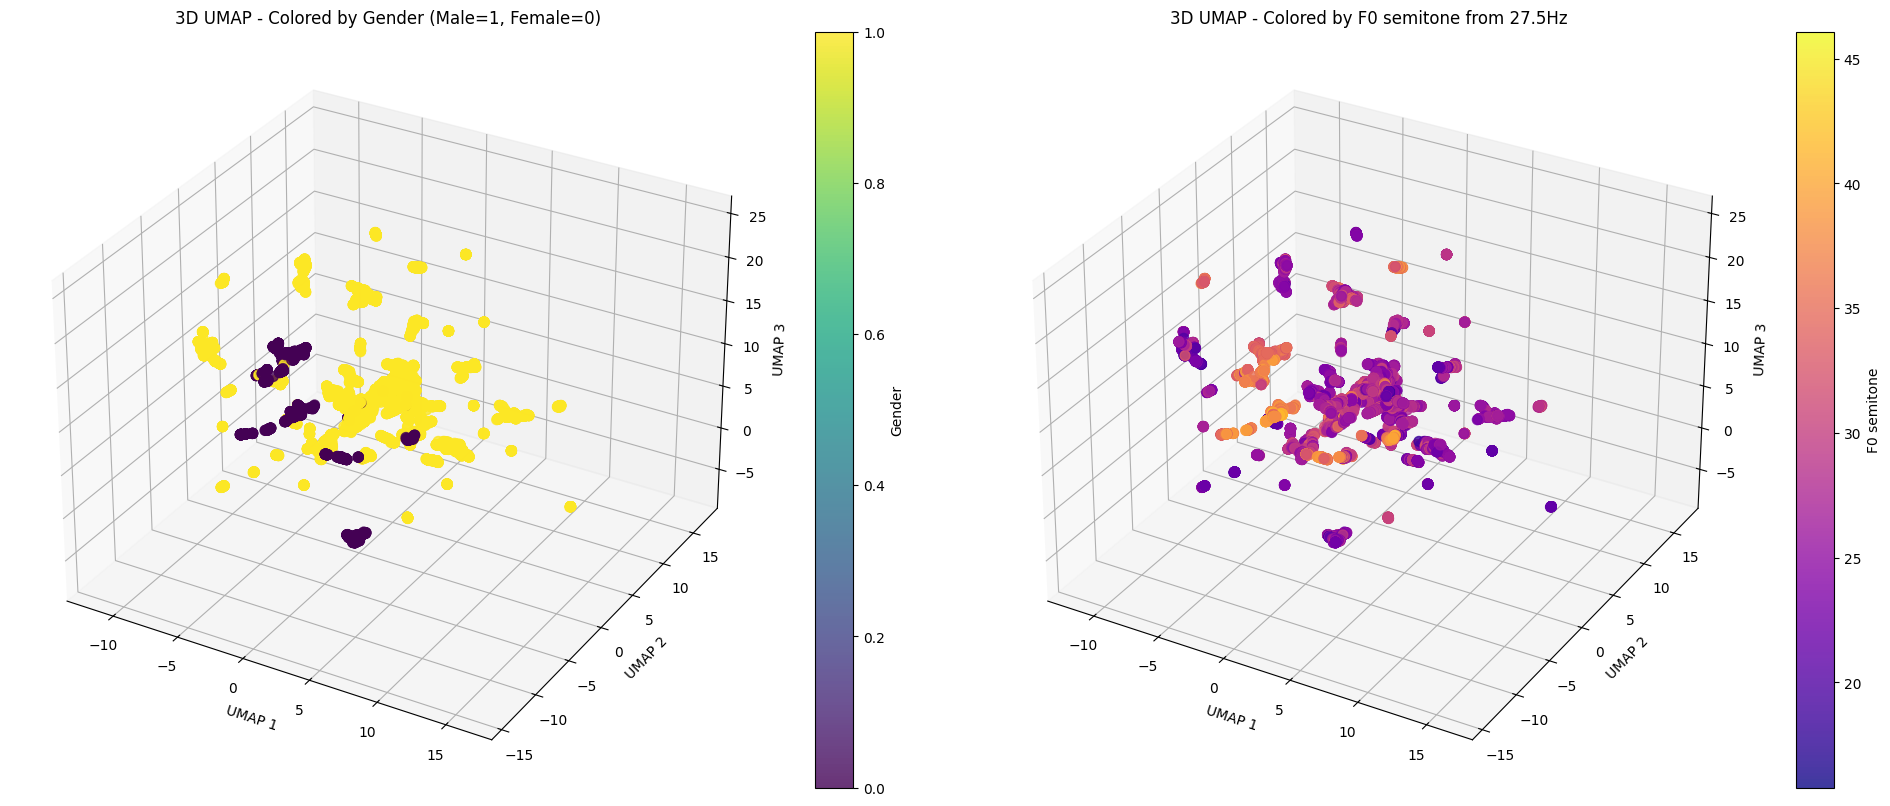

In [17]:
# Define both y values
y1 = df["gender"].str.contains("m").astype(float)
y2 = df["F0semitoneFrom27.5Hz_sma3nz_amean"]

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))

# First subplot - Gender-based coloring
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y1, cmap='viridis', s=50, alpha=0.8)
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
ax1.set_zlabel('UMAP 3')
ax1.set_title('3D UMAP - Colored by Gender (Male=1, Female=0)')
plt.colorbar(scatter1, ax=ax1, label='Gender')

# Second subplot - F0-based coloring
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y2, cmap='plasma', s=50, alpha=0.8)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_zlabel('UMAP 3')
ax2.set_title('3D UMAP - Colored by F0 semitone from 27.5Hz')
plt.colorbar(scatter2, ax=ax2, label='F0 semitone')

plt.tight_layout()
plt.show()